In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [26]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data
normalized_data = scaler.fit_transform(market_data_df)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=market_data_df.columns, index=market_data_df.index)

# Display the first few rows of the normalized DataFrame
normalized_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [48]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(normalized_data, columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the "coinid" column as index
scaled_df.index = crypto_names

# Display sample data
scaled_df.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [69]:
# Create a list with the number of k-values to try
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using the scaled DataFrame
    kmeans_model.fit(scaled_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"Number of Clusters (k)": k_values, "Inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df



c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarnin

,Number of Clusters (k),Inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,54.739922
6,7,43.481606
7,8,37.517032
8,9,32.591891
9,10,28.222899


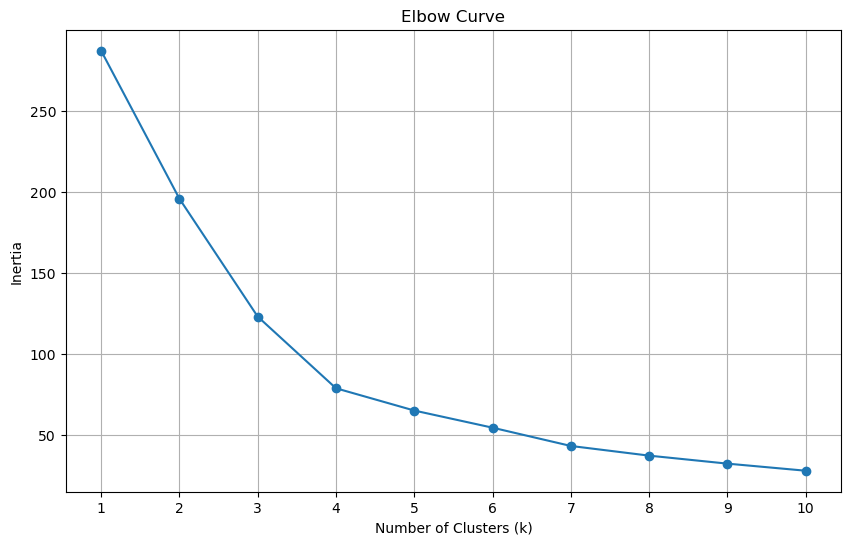

In [89]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["Number of Clusters (k)"], elbow_df["Inertia"], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()



#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**
There does not appear to be distinct "elbow" point. However, I would say inertia starts to decrease at a slower rate around 
k=3 or 𝑘=4.  

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [108]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=3, random_state=42)
# Fit the model to the scaled data
kmeans_model.fit(scaled_df)

c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [126]:
# Fit the K-Means model to the scaled data
kmeans_model.fit(scaled_df)



c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [143]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(scaled_df)

# View the resulting array of cluster values.
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2
 1 1 1 1]


In [159]:
# Create a copy of the DataFrame
df_copy = scaled_df.copy()

In [174]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['Cluster'] = clusters

# Display sample data
print(df_copy.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

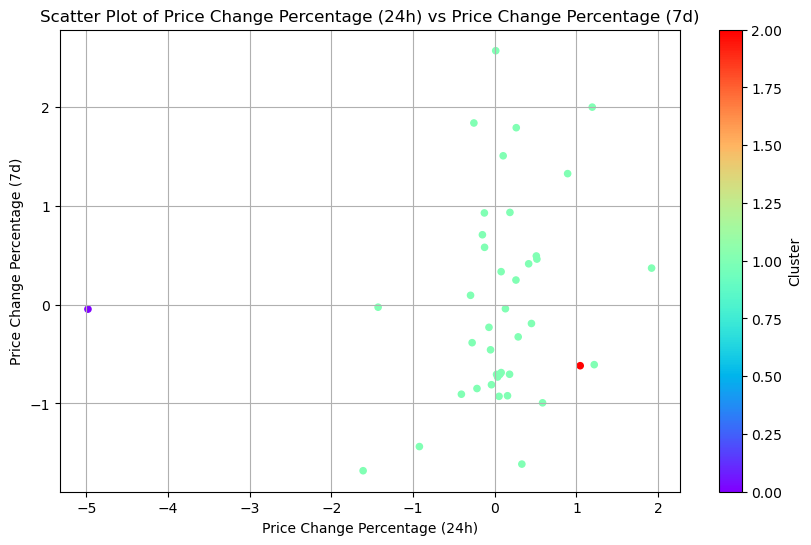

In [188]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

df_copy.plot(kind='scatter', x='price_change_percentage_24h', y='price_change_percentage_7d', c='Cluster', colormap='rainbow', figsize=(10, 6))
plt.title('Scatter Plot of Price Change Percentage (24h) vs Price Change Percentage (7d)')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.grid(True)
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [201]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [213]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca_model.fit_transform(scaled_df)

# Convert the transformed data array into a DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# View the first five rows of the DataFrame. 
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [224]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

# Print the explained variance for each principal component
print("Explained Variance for Each Principal Component:")
for i, ev in enumerate(explained_variance):
    print(f"PC{i+1}: {ev:.4f}")

Explained Variance for Each Principal Component:
PC1: 0.3720
PC2: 0.3470
PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  The total explained variance of the three principal components is the sum of the explained variances for each principal component. To calculate we retrieve the explained variance for each principal component using the explained_variance_ratio_ attribute of the PCA model and sum up these values.


In [234]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# Copy the crypto names from the original data
crypto_names = scaled_df.index

# Set the coinid column as index
pca_df.index = crypto_names

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [243]:
# Create a list with the number of k-values to try
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using PCA DataFrame
    kmeans_model.fit(pca_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"Number of Clusters (k)": k_values, "Inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)



c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarnin

   Number of Clusters (k)     Inertia
0                       1  256.874086
1                       2  165.901994
2                       3   93.774626
3                       4   49.665497
4                       5   37.839466
5                       6   30.777746
6                       7   21.134056
7                       8   17.091637
8                       9   13.681140
9                      10   10.630648


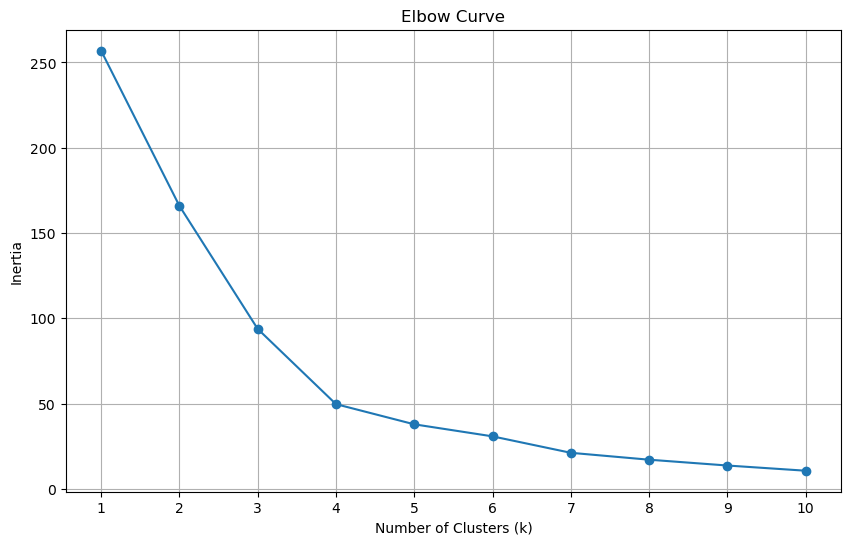

In [251]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["Number of Clusters (k)"], elbow_df["Inertia"], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
  Based on the elbow curve the best value for k when using PCA data would be k=3 or k=4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
Comparing both plots, it appears that the optimal k value using the original data is also k=3 or k=4
This suggests that dimensionality reduction through PCA did not significantly alter the clustering structure.   The optimal 
𝑘 value remains the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [277]:
# Initialize the K-Means model using the best value for k
best_k = 3
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

print(kmeans_model)

KMeans(n_clusters=3, random_state=42)


In [278]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df)

c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RobertRodrigues\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [279]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_model.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [280]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['Cluster'] = pca_clusters

# Display sample data
print(pca_df_copy.head())



                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        0


In [281]:
import hvplot.pandas

# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_df_copy.hvplot.scatter(x='PC1', y='PC2', by='Cluster', hover_cols=['Cluster'], title='PCA Scatter Plot')

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [282]:
# Use the columns from the original scaled DataFrame as the index.
pca_df_copy.index = scaled_df.index

# Print pca_df_copy
print(pca_df_copy)

                           PC1       PC2       PC3  Cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        0
ethereum             -0.458261  0.458466  0.952877        0
tether               -0.433070 -0.168126 -0.641752        0
ripple               -0.471835 -0.222660 -0.479053        0
bitcoin-cash         -1.157800  2.041209  1.859715        0
binancecoin          -0.516534  1.388377  0.804071        0
chainlink            -0.450711  0.517699  2.846143        0
cardano              -0.345600  0.729439  1.478013        0
litecoin             -0.649468  0.432165  0.600303        0
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        0
crypto-com-chain     -0.248198 -1.376252 -1.462026        0
usd-coin             -0.438408 -0.175337 -0.663388        0
eos                  -0.693425 -0.473815 -0.527597        0
monero                0.060499  2.909404  1.498571        0
tron                 -0.393352 -0.108192

In [283]:
# Get the loadings or coefficients for each principal component
loadings = pca_model.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=scaled_df.columns, index=['PC1', 'PC2', 'PC3'])

# Display the DataFrame
print("Loadings or Coefficients for Each Principal Component:")
print(loadings_df)

Loadings or Coefficients for Each Principal Component:
     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.416728                   -0.102432   
PC2                     0.358162                    0.227432   
PC3                    -0.218795                    0.787670   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                    -0.009162                     0.191523   
PC2                     0.540415                     0.562182   
PC3                     0.349534                    -0.181744   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.320365                      0.594468   
PC2                     0.434040                      0.027735   
PC3                    -0.361377                      0.039733   

     price_change_percentage_1y  
PC1                    0.568379  
PC2                   -0.150789  
PC3                    0.210541  


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
For PC1, price_change_percentage_24h, price_change_percentage_7d, and volume_24h have the strongest influence.
For PC2, volume_24h has the strongest influence.
For PC3, price_change_percentage_7d has the strongest influence.   